# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [31]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


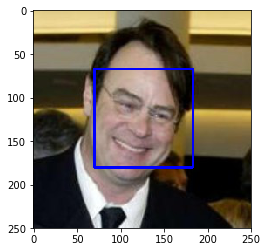

In [32]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [33]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [34]:
#Create a function to generate number of true entries in a boolean matrix. Algorithm complexity: O(n^2) (?) or is it O(n) because second if statement is O(1)? Not sure. 

def number_true(array):
    count = 0
    for i in array:
        if i == True:
            count +=1
    return count

#assign result to variable, otherwise count is destroyed after function concludes
x = number_true([True, False, True])

percentageCorrect = x/3

print(percentageCorrect)

0.6666666666666666


In [35]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

#vectorize and create a boolean matrix for both human_files and dog_files. Creates matrix fast. 
x = lambda x: face_detector(x) 

truefalsearray= np.vectorize(x)

array1 = truefalsearray(human_files_short)

array2 = truefalsearray(dog_files_short)

#Apply the function to both arrays and print out the results

count1 = number_true(array1)

percentageCorrect1 = count1/len(array1)

count2 = number_true(array2)

percentageCorrect2 = count2/len(array2)


#Output the total percentage of correct classifications
print("The Percentage of Correct Classifications for humans is", percentageCorrect1, "%")

print("The Percentage of Correct Classifications for dogs is", percentageCorrect2, "%")

The Percentage of Correct Classifications for humans is 0.98 %
The Percentage of Correct Classifications for dogs is 0.17 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [36]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [37]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [38]:
#import for use of imshow function. File was used in udacity pytorch challenge

#imports for image processing
import PIL
from PIL import Image
from PIL import PngImagePlugin

#imports for data transformation
import torchvision.transforms as transforms

In [39]:
# From pytorch udacity challenge. Preprocess an image using transforms. 

# Transform the image to tensor
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model
    
    img = Image.open(image)
    img_loader = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([.485, .456, .406],
                                                        [.229, .224, .225])])
    img = img_loader(img)
    img = np.array(img)
    return img

In [40]:
#Now this needs to be transformed into a pytorch tensor to be used by the VGG network. 

#transform image form numpy to torch tensor 
x = process_image(human_files[0])

x = torch.from_numpy(x).float()

x

tensor([[[ 1.9235,  1.9407,  1.9407,  ...,  1.9920,  2.0092,  2.0092],
         [ 1.9235,  1.9407,  1.9235,  ...,  2.0092,  2.0092,  2.0092],
         [ 1.8722,  1.8893,  1.8722,  ...,  1.9749,  1.9749,  1.9749],
         ...,
         [-1.9809, -1.9809, -1.9638,  ..., -0.6452, -0.6623, -0.7479],
         [-1.9809, -1.9809, -1.9638,  ..., -0.6109, -0.6452, -0.7308],
         [-1.9809, -1.9638, -1.9638,  ..., -0.5767, -0.6109, -0.7479]],

        [[ 1.7108,  1.7108,  1.7108,  ...,  1.7633,  1.7808,  1.7808],
         [ 1.6933,  1.7108,  1.6933,  ...,  1.7808,  1.7808,  1.7808],
         [ 1.6408,  1.6583,  1.6408,  ...,  1.7458,  1.7458,  1.7458],
         ...,
         [-1.8431, -1.8431, -1.8256,  ..., -0.9503, -0.9328, -1.0028],
         [-1.8431, -1.8431, -1.8256,  ..., -0.9503, -0.9328, -1.0203],
         [-1.8431, -1.8256, -1.8256,  ..., -0.9328, -0.9503, -1.0553]],

        [[ 0.7576,  0.7402,  0.7402,  ...,  0.6531,  0.6705,  0.6705],
         [ 0.7402,  0.7402,  0.7228,  ...,  0

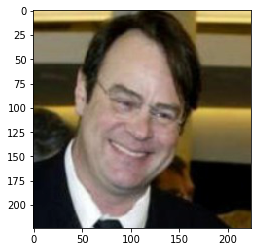

In [41]:
#I want to see what the actual image looks like. Lets use the helper.py file and the imshow function from the pytorch challenge


def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax
  
imshow(x)

In [42]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = process_image(img_path)
    
    img = torch.from_numpy(img)
    
    #This line is important. Adds an extra singleton dimension so that convolutional net can accept the image. 
    img = img.unsqueeze_(0)
    
    #move image to the GPU
    if use_cuda:
        img = img.to('cuda')
    
    output = VGG16(img)
    
    _, preds_tensor = torch.max(output, 1)
    
    preds= np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return preds # predicted class index

In [43]:
#Test the image function above with a sample image
VGG16_predict(human_files[0])

array(834)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [44]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    img = process_image(img_path)
    
    img = torch.from_numpy(img)
    
    #This line is important. Adds an extra singleton dimension so that convolutional net can accept the image. 
    img = img.unsqueeze_(0)
    
    #move to GPU
    if use_cuda:
        img = img.to('cuda')
    
    output = VGG16(img)
    
    _, preds_tensor = torch.max(output, 1)
    
    preds= np.squeeze(preds_tensor.cuda().numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    dog_indices =  list(range(151, 269))
    
    if preds in dog_indices:
        Boolean = True
    else:
        Boolean = False# predicted class index
    
    return Boolean # true/false 

In [45]:
#test the dog_detector on one image from each before extrapolating to whole dataset. 

#We expect true for dog_files and false for human_files

Dog = dog_detector(dog_files_short[1])

print("The Boolean for Dog is: ", Dog)

Human = dog_detector(human_files_short[2])

print("The Boolean for Human is: ", Human)

The Boolean for Dog is:  True
The Boolean for Human is:  False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [46]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

#vectorize and create a boolean matrix for both human_files and dog_files. 
x = lambda x: dog_detector(x) 

truefalsearray= np.vectorize(x)

array1 = truefalsearray(human_files_short)

totaltrue1 = number_true(array1)

percentageCorrect1 = totaltrue1/len(array1)

array2 = truefalsearray(dog_files_short)

totaltrue2 = number_true(array2)

percentageCorrect2 = totaltrue2/len(array2)


print("The total correct percentage classification for humans is: ", percentageCorrect1)

print("The total correct percentage classification is dogs is: ", percentageCorrect2)

The total correct percentage classification for humans is:  0.02
The total correct percentage classification is dogs is:  1.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [47]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:

# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "dogImages.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

FileNotFoundError: [Errno 2] No such file or directory: 'dogImages.zip'

In [48]:

import os
from torchvision import transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor

transforms1 = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


transforms2 = transforms.Compose([transforms.RandomHorizontalFlip(45),
    transforms.RandomVerticalFlip(p=.25),
    transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])



 # choose the training and test datasets
train_data = datasets.ImageFolder('dogImages/train', transform = transforms2)

valid_data = datasets.ImageFolder('dogImages/valid', transform = transforms1)

test_data = datasets.ImageFolder('dogImages/test', transform = transforms1)

# obtain training indices that will be used for validation
#num_train = len(train_data)
#indices = list(range(num_train))
#np.random.shuffle(indices)
#split = int(np.floor(valid_size * num_train))
#train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
#train_sampler = SubsetRandomSampler(train_idx)
#valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,  shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
    
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?



**Answer**:
resizing is done by resizing image to 256 and then cropping to 224 for all datasets.

input tensor: 224 x 224 x 3 x 1    

The image size is 224 x 224

3 comes from the number of color channels: red, green and blue

1 comes from the singleton dimension needed so that the image can be accepted by the network. 

Augmenting the dataset was done with random vertical flips and random horizontal flips at 45 degrees. This creates a bigger dataset that can be used by the network. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [68]:
import torch.nn as nn
import torch.nn.functional as F


hidden_1 = 6280

hidden_2 = 6280

num_classes = 133

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        #convolutional layer (sees 224 x 224 x 3)
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        
        #convolutional layer (sees 112 x 112 x 16 )
        self.conv2 = nn.Conv2d(16,32, 3, padding = 1 )
        
        #convolutional layer( sees 56 x 56 x 32)
        self.conv3 = nn.Conv2d(32, 64,3, padding = 1)
        
        #convolutional layer (sees 28 x 28 x 64)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1 )
        
        #convolutional layer (sees 14 x 14 x 128)
        self.conv5 = nn.Conv2d(128, 256, 3, padding = 1)
        
        #Define a maxpool block to reduce dimensionality
        self.pool = nn.MaxPool2d(2,2)
    
        #Batchnorm layer
        
        self.conv1_bn = nn.BatchNorm2d(16)
        
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4_bn = nn.BatchNorm2d(128)
        
        self.conv5_bn = nn.BatchNorm2d(256)
        
        #Linear Layer 1 (depth of layer * x dim * y dim, hidden1)
        self.fc1 = nn.Linear(256*7*7, hidden_1)
        
        #Linear Layer 2 (hidden1 -> hidden 2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        
        #Linear layer 3 (hidden_2 -> num_classes)
        
        self.fc3 = nn.Linear(hidden_2, num_classes)
        
        self.dropout = nn.Dropout(.75)
       
        
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.relu(self.conv1_bn(self.conv1(x))))
        x = self.pool(F.relu(self.conv2_bn(self.conv2(x))))
        x = self.pool(F.relu(self.conv3_bn(self.conv3(x))))
        x = self.pool(F.relu(self.conv4_bn(self.conv4(x))))
        x = self.pool(F.relu(self.conv5_bn(self.conv5(x))))
                      
        # flatten image input
        
        x = x.view(-1, 256*7*7)
                 
        #x = x.view(x.size(0), -1)
        #add dropout layer 
        x = self.dropout(x)
        
        #Add first hidden layer
        x = F.relu(self.fc1(x))
        
        #add second layer 
        x = F.relu(self.fc2(x))
                      
        #add final layer
        x = F.relu(self.fc3(x))
                      
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()



__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Defining the convolutional layers comes first. I thought of creating 5 convolutional layers to capture as much spatial information as possible without overfitting. The 5 convolutional layers will reduce the size of the image from 224 x 224 x 3 to 256 * 7 * 7. So the depth of the image is 256 and the image x and y dimensions are 7 and 7. The maxpool layer downsizes the image by 2 in dimensions. I chose 2 because it evenly divides the size of the picture for all the layers. I applied batch normalization to all the convolutional layers. This allows the layers to learn more independently of each other.  The next step is the linear layers. There are three layers after the convolutional layers. The first hidden layer takes an input of 256 * 7 * 7 and goes to a hidden layer 1 that is half of the size of the input. From hidden layer 1 to hidden layer 2 its the same size. From hidden layer 2 it goes to the num of classes which is 133. I added a dropout of p = .75 to prevent overfitting. The overfitting tended to be aggressive so I had to make this value high. 

In [49]:
from PIL import ImageFile 

ImageFile.LOAD_TRUNCATED_IMAGES = True

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [50]:
import torch.optim as optim


### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = .01)

NameError: name 'model_scratch' is not defined

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #clear all gradients of all optimized variables 
            optimizer.zero_grad()
            
            
            #forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            #calculate the loss after each epoch
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
             # perform a single optimization step (parameter update)
            optimizer.step()
            
            #calculate average training loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            output = model.forward(data)

            loss = criterion(output, target)
                
            ## update the average validation loss
            valid_loss = valid_loss + ((1/ (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            
            torch.save(model.state_dict(), 'model_scratch.pt')
            
            valid_loss_min = valid_loss
            
        
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.885881 	Validation Loss: 4.871780
Validation loss decreased (inf --> 4.871780). Saving model ...
Epoch: 2 	Training Loss: 4.863862 	Validation Loss: 4.847791
Validation loss decreased (4.871780 --> 4.847791). Saving model ...
Epoch: 3 	Training Loss: 4.836558 	Validation Loss: 4.816994
Validation loss decreased (4.847791 --> 4.816994). Saving model ...
Epoch: 4 	Training Loss: 4.794854 	Validation Loss: 4.765638
Validation loss decreased (4.816994 --> 4.765638). Saving model ...
Epoch: 5 	Training Loss: 4.733595 	Validation Loss: 4.698181
Validation loss decreased (4.765638 --> 4.698181). Saving model ...
Epoch: 6 	Training Loss: 4.646353 	Validation Loss: 4.627349
Validation loss decreased (4.698181 --> 4.627349). Saving model ...
Epoch: 7 	Training Loss: 4.579050 	Validation Loss: 4.653726
Epoch: 8 	Training Loss: 4.534204 	Validation Loss: 4.574209
Validation loss decreased (4.627349 --> 4.574209). Saving model ...
Epoch: 9 	Training Loss: 4.489618 	Valida

KeyboardInterrupt: 



### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.194744


Test Accuracy: 16% (135/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


import os
from torchvision import transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor

transforms1 = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transforms2 = transforms.Compose([transforms.RandomHorizontalFlip(45),
    transforms.RandomVerticalFlip(p=.25),
    transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])



 # choose the training and test datasets
train_data = datasets.ImageFolder('dogImages/train', transform = transforms2)

valid_data = datasets.ImageFolder('dogImages/valid', transform = transforms1)

test_data = datasets.ImageFolder('dogImages/test', transform = transforms1)

# obtain training indices that will be used for validation
#num_train = len(train_data)
#indices = list(range(num_train))
#np.random.shuffle(indices)
#split = int(np.floor(valid_size * num_train))
#train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
#train_sampler = SubsetRandomSampler(train_idx)
#valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,  shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
    
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [11]:
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()



for param in model_transfer.parameters():
    param.requires_grad = False
  


classifier = nn.Sequential(nn.Linear(2048, 133))


model_transfer.fc = classifier
    
    
if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:02<00:00, 81666186.57it/s]


In [12]:
#for param in model_transfer.parameters():
#    param.requires_grad = False
  
for param in model_transfer.fc.parameters():
    param.requires_grad = True

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

From the pytorch challenge, great results were acquired from resnet152. The final classifier layer will be deleted and replaced with a linear layer to take an input of 2048 features and output of 133 which is the num of classes. the pretrained model's parameters for all layers besides the fc classifier will be frozen with param.requires_grad = False. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [13]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = .01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #clear all gradients of all optimized variables 
            optimizer.zero_grad()
            
            
            #forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            #calculate the loss after each epoch
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
             # perform a single optimization step (parameter update)
            optimizer.step()
            
            #calculate average training loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            output = model.forward(data)

            loss = criterion(output, target)
                
            ## update the average validation loss
            valid_loss = valid_loss + ((1/ (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            
            torch.save(model.state_dict(), 'model_transfer.pt')
            
            valid_loss_min = valid_loss
            
        
    # return trained model
    return model




In [22]:

# train the model
model_transfer =  train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.566293 	Validation Loss: 0.368341
Validation loss decreased (inf --> 0.368341). Saving model ...
Epoch: 2 	Training Loss: 0.547878 	Validation Loss: 0.368949
Epoch: 3 	Training Loss: 0.543130 	Validation Loss: 0.366751
Validation loss decreased (0.368341 --> 0.366751). Saving model ...
Epoch: 4 	Training Loss: 0.546110 	Validation Loss: 0.360248
Validation loss decreased (0.366751 --> 0.360248). Saving model ...
Epoch: 5 	Training Loss: 0.539950 	Validation Loss: 0.367883


KeyboardInterrupt: 

In [14]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [18]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.378318


Test Accuracy: 89% (747/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [37]:
class_names = [item[4:].replace("_", " ") for item in test_data.classes]

print(class_names[6])

American foxhound


In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in test_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
   
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = process_image(img_path)
    
    img = torch.from_numpy(img)
    
    #This line is important. Adds an extra singleton dimension so that convolutional net can accept the image. 
    img = img.unsqueeze_(0)
    
    #move image to the GPU
    if use_cuda:
        img = img.to('cuda')
    
    output = model_transfer(img)
    
    _, preds_tensor = torch.max(output, 1)
    
    preds= np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    preds = class_names[preds]
    
    
    return preds # predicted class index
    

Smooth fox terrier


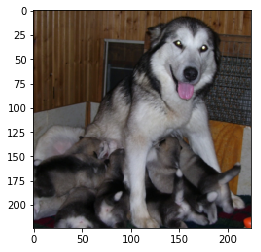

In [28]:
x= predict_breed_transfer(dog_files[968])

print(x)

y = process_image(dog_files[968])

y = torch.from_numpy(y)

imshow(y)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [29]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path) == True:
        print("you are a human")
    
        x = process_image(img_path)
        
        x = torch.from_numpy(x).float()
        
        imshow(x)
        
        print("You look like a ... ")
        print(predict_breed_transfer(img_path))
        
    elif dog_detector(img_path) == True:
        print("you are a dog!")
         
        x = process_image(img_path)
        
        x = torch.from_numpy(x).float()
        
        imshow(x)
        
        print("You look like a ... ")
            
        print(predict_breed_transfer(img_path))
    else:
        print("I am not sure what you are!")
        
        x = process_image(img_path)
        
        x = torch.from_numpy(x).float()
        
        imshow(x)
        
        print("You look like a ... ")
            
        print(predict_breed_transfer(img_path))
        
    
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1. Sandwich the image between the print statements. 

2. have the images horizontally placed instead of vertically. 

3. Train the network more for more accurate results. 


All in all, output is not what I was hoping for. 

you are a human
You look like a ... 
Dachshund
you are a human
You look like a ... 
Dachshund
you are a human
You look like a ... 
Dachshund
you are a dog!
You look like a ... 
Smooth fox terrier
you are a dog!
You look like a ... 
Dachshund
you are a dog!
You look like a ... 
Dachshund


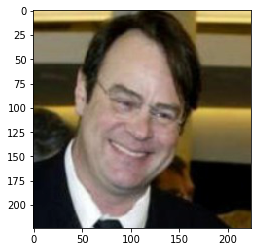

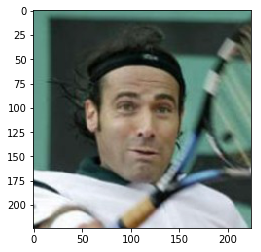

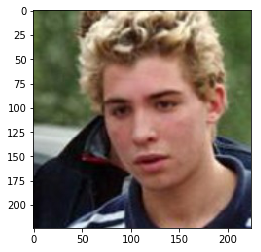

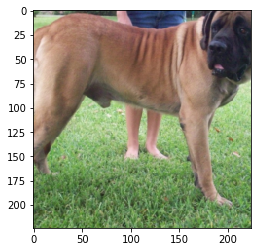

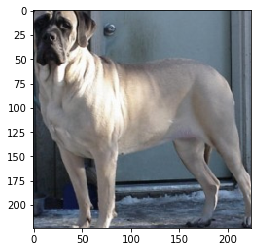

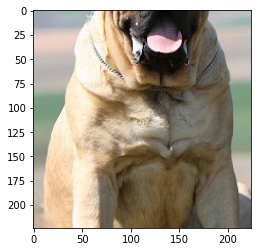

In [30]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)